# Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("Cancer_Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data.drop(["Unnamed: 32", "id"],axis=1, inplace=True)

In [4]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

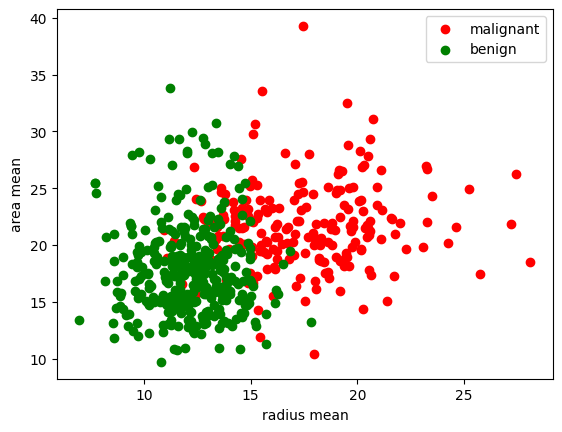

In [5]:
plt.scatter(M.radius_mean, M.texture_mean, color="red", label="malignant")
plt.scatter(B.radius_mean, B.texture_mean, color="green", label="benign")
plt.legend()
plt.xlabel("radius mean")
plt.ylabel("area mean")
plt.show()

In [6]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]

In [7]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [8]:
x = (x_data - np.min(x_data)/(np.max(x_data)-np.min(x_data)))

In [9]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [11]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [12]:
svc.score(x_test, y_test)

0.9181286549707602

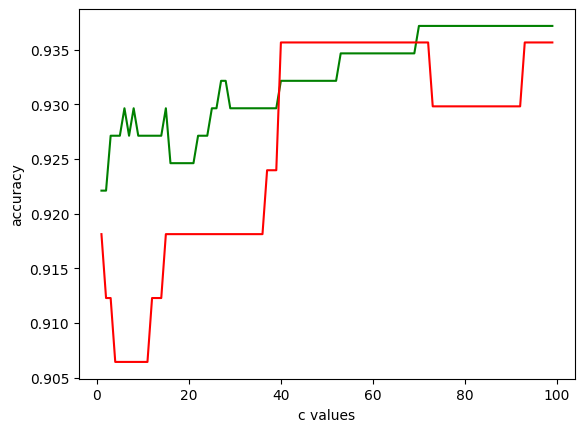

In [13]:
train_accuracy = []
test_accuracy = []

for i in range(1,100):
    svm = SVC(C=i)
    svm.fit(x_train, y_train)
    train_accuracy.append(svm.score(x_train, y_train))
    test_accuracy.append(svm.score(x_test, y_test))
plt.plot(range(1,100), train_accuracy, label="Training Accuracy", color="green")
plt.plot(range(1,100), test_accuracy, label="Testing Accuracy", color="red")
plt.xlabel("c values")
plt.ylabel("accuracy")
plt.show()


In [14]:
print("Best accuracy is {} when c={}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.935672514619883 when c=40
